<a href="https://colab.research.google.com/github/chandrakiranck/fuzzy-adventure/blob/master/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,confusion_matrix,roc_curve


In [0]:
data=pd.read_csv("/content/drive/My Drive/casestudy datasets/creditcard_fraud.csv")

In [0]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [0]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [0]:
data["Class"].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

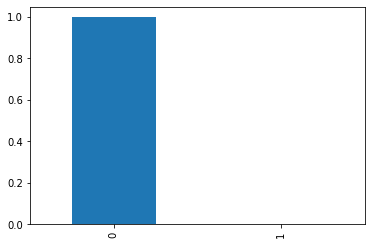

In [0]:
data["Class"].value_counts(normalize=True).plot.bar()

In [0]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [0]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [0]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

There are two variables which are amount ,time that are not standardize like rest of the variables

## **Creating New DataFrame**

In [0]:
data2=data.loc[:,["Amount","Time"]]

## **Scaling The Data**

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
data2=ss.fit_transform(data2)

In [0]:
data2=pd.DataFrame(data2,columns=["Amount","Time"])

In [0]:
data2.head()

,Amount,Time
0,0.244964,-1.996583
1,-0.342475,-1.996583
2,1.160686,-1.996562
3,0.140534,-1.996562
4,-0.073403,-1.996541


after scaling the data we merging the dataframes with one another data=data2 which we are scaled variables

In [0]:
data["Amount"]=data2["Amount"]
data["Time"]=data2["Time"]

caping the variable amount the values are higher(outliers) 

In [0]:
q1=data.Amount.quantile(0.25)
q2=data.Amount.quantile(0.5)
q3=data.Amount.quantile(0.75)
print("q1",q1)
print("q2",q2)
print("q3",q3)
iqr=q3-q1

data=data[~(data["Amount"]>(q3+1.5*iqr))]

q1 -0.33084011028077104
q2 -0.2652714967001885
q3 -0.044717071811601214


In [0]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Taking the dependent and independent variables in different x and y

In [0]:
y=data["Class"]
X=data.drop(["Class","V14","V4","V10","V12","V11","V16"],axis=1)

spliting the data train and test with using starify with 30% in test 

---



---



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y,
                                                    random_state=42)

Straify we used for the purpose of splitting the data in as same itwill show as like originnal data percentage

## **MODEL CREATION**

In [0]:
def model_fit(algo,X_train,y_train,X_test,y_test):
  algo.fit(X_train,y_train)
  y_train_pred=algo.predict(X_train)
  y_train_prob=algo.predict_proba(X_train)[:,1]
  print("auc score of train data",roc_auc_score(y_train,y_train_prob))

  y_test_pred=algo.predict(X_test) #ML
  y_test_prob=algo.predict_proba(X_test)[:,1] #  in statistics
  print("auc score of test data",roc_auc_score(y_test,y_test_prob))
  print("confusion_matrix",confusion_matrix(y_test,y_test_pred))
  
  fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
  plt.plot(fpr,tpr)
  plt.plot(fpr,fpr)
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.title("ROC_AUC CURVE")

### **LOGISTIC REGRESSION**

auc score of train data 0.9384301429251932
auc score of test data 0.9756402555741839
confusion_matrix [[75737    14]
 [   51    69]]


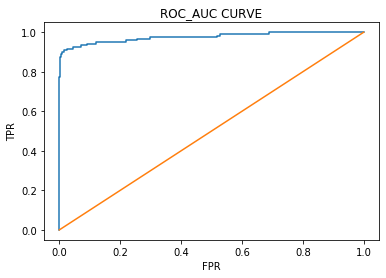

In [0]:
lr=LogisticRegression(solver="liblinear")
model_fit(lr,X_train,y_train,X_test,y_test)

## **Strategies for Handling ImbalancedData**

**UnderSampling the Majority Class**

In [0]:
Xy_train=pd.concat([X_train,y_train],axis=1)
Xy_train0=Xy_train.loc[Xy_train["Class"]==0]
Xy_train1=Xy_train.loc[Xy_train["Class"]==1]

len1=len(Xy_train1)
len0=len(Xy_train0)

Xy_train0_us=Xy_train0.sample(len1)

Xy_train_us=pd.concat([Xy_train0_us,Xy_train1],axis=0)

y_train_us=Xy_train_us["Class"]
X_train_us=Xy_train_us.drop(["Class"],axis=1)

In [0]:
print(X_train_us.shape)
print(y_train_us.shape)
print(y_train_us.value_counts())

(562, 24)
(562,)
1    281
0    281
Name: Class, dtype: int64


auc score of train data 0.9752029482909285
auc score of test data 0.9872832811888073
confusion_matrix [[72038  3713]
 [    6   114]]


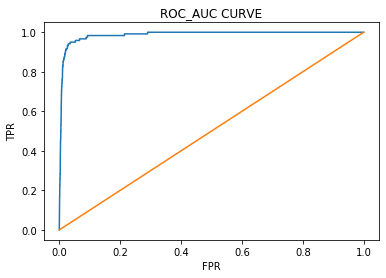

In [0]:
model_fit(lr,X_train_us,y_train_us,X_test,y_test)

### **RANDOM FOREST**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auc score of train data 0.9999936677600334
auc score of test data 0.9864506189137218
confusion_matrix [[72777  2974]
 [    7   113]]


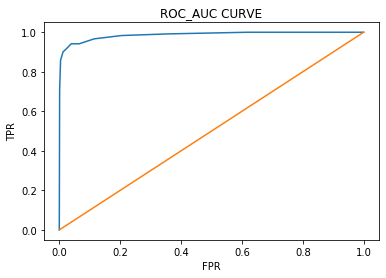

In [0]:
rf=RandomForestClassifier()
model_fit(rf,X_train_us,y_train_us,X_test,y_test)

**Over-Sampling Minority Class**

In [0]:
Xy_train0=Xy_train.loc[Xy_train["Class"]==0]
Xy_train1=Xy_train.loc[Xy_train["Class"]==1]

len1=len(Xy_train1)
len0=len(Xy_train0)

Xy_train1_os=Xy_train1.sample(len0,replace=True)

Xy_train_os=pd.concat([Xy_train1_os,Xy_train0],axis=0)

y_train_os=Xy_train_os["Class"]
X_train_os=Xy_train_os.drop(["Class"],axis=1)

In [0]:
print(X_train_os.shape)
print(y_train_os.shape)
print(y_train_os.value_counts())

(353502, 24)
(353502,)
1    176751
0    176751
Name: Class, dtype: int64


auc score of train data 0.9687575974254803
auc score of test data 0.9917522540956555
confusion_matrix [[72963  2788]
 [    8   112]]


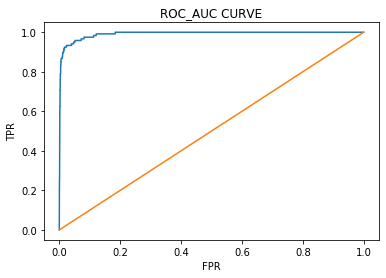

In [0]:
model_fit(lr,X_train_os,y_train_os,X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


auc score of train data 1.0
auc score of test data 0.9496237673430054
confusion_matrix [[75747     4]
 [   34    86]]


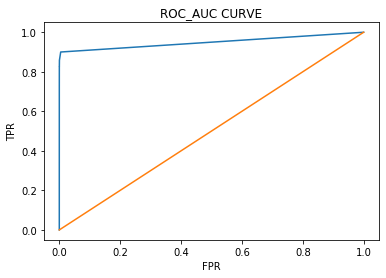

In [0]:
rf=RandomForestClassifier()
model_fit(rf,X_train_os,y_train_os,X_test,y_test)

### **SMOTE**

In [0]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(ratio="minority")

X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)

auc score of train data 0.9723711670146813
auc score of test data 0.9852334182607051
confusion_matrix [[72907  2844]
 [    7   113]]


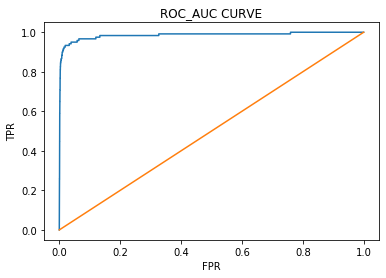

In [0]:
model_fit(lr,X_train_sm,y_train_sm,X_test,y_test)

In [0]:
X_train_sm.shape

(353502, 24)

# Applying PCA to Reduce dimension and Check impact on Models

In [0]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_train)
variance = pd.DataFrame(pca.explained_variance_ratio_)



In [0]:
pca.explained_variance_ratio_

array([0.1730733 , 0.12143761, 0.0890762 , 0.08002826, 0.07517344,
       0.06396397, 0.0549502 , 0.04796489, 0.0437014 , 0.03454863,
       0.03322648, 0.03020029, 0.02832078, 0.02463852, 0.02158289,
       0.01719802, 0.01649897, 0.01100032, 0.01018535, 0.00813902,
       0.00591031, 0.00541038, 0.00301863, 0.00075214])

In [0]:
np.cumsum(pca.explained_variance_ratio_)

array([0.1730733 , 0.29451091, 0.38358711, 0.46361538, 0.53878882,
       0.60275279, 0.65770299, 0.70566788, 0.74936927, 0.78391791,
       0.81714439, 0.84734468, 0.87566546, 0.90030398, 0.92188687,
       0.93908489, 0.95558385, 0.96658417, 0.97676953, 0.98490854,
       0.99081885, 0.99622923, 0.99924786, 1.        ])

Text(0, 0.5, 'Cumulative explained variance')

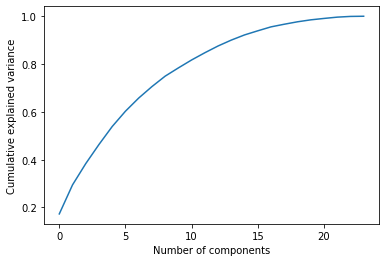

In [0]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

first component we get the maximum varaince in pca

In [0]:
pca=PCA(n_components=14)
pca.fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

auc score of train data 0.9138759472053001
auc score of test data 0.9582159531447331
confusion_matrix [[75738    13]
 [   60    60]]


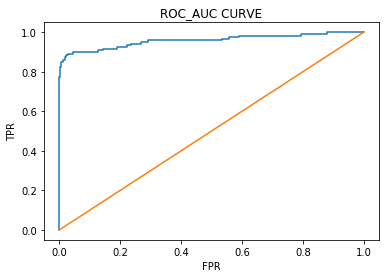

In [0]:
model_fit(lr,X_train_pca,y_train,X_test_pca,y_test)

auc score of train data 0.9999995369161486
auc score of test data 0.9497292114955578
confusion_matrix [[75743     8]
 [   29    91]]


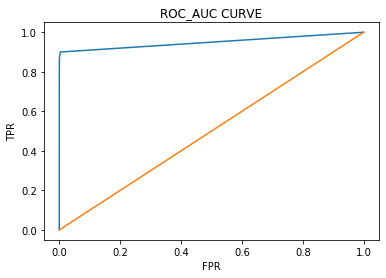

In [0]:
model_fit(rf,X_train_pca,y_train,X_test_pca,y_test)

In [0]:
pca.components_.T.shape

(24, 14)

In [0]:
pd.DataFrame(pca.components_.T,index=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
Time,-0.101288,0.367879,-0.134233,-0.150077,0.146284,0.021046,0.002657,-0.245077,-0.428730,0.132009,-0.270451,0.062169,-0.411316,0.051103
V1,-0.929094,0.011705,0.118498,0.000853,-0.267096,-0.016499,0.039052,0.005960,0.023990,-0.009514,0.017861,0.004364,0.043081,-0.000650
V2,0.339154,0.287136,0.222731,-0.091273,-0.741666,0.012408,0.107551,-0.046146,-0.042087,0.018607,-0.010617,0.016317,0.007845,0.003768
V3,0.059833,-0.874152,-0.050735,-0.150094,-0.151829,-0.007142,0.002787,-0.123932,-0.206750,0.044308,-0.109782,0.029578,-0.133456,0.021375
V5,0.000755,0.104798,-0.793009,-0.287593,0.059353,-0.032660,-0.003361,0.137501,0.167351,-0.014184,0.070441,0.009117,0.129649,-0.006748
V6,-0.023837,-0.041377,-0.502756,0.688322,-0.400630,0.025321,0.002091,-0.087556,-0.101697,0.002218,-0.027315,-0.005460,-0.079383,0.006723
V7,-0.060715,-0.012972,-0.164193,-0.588707,-0.349478,-0.279633,0.018261,-0.030142,0.001108,-0.015859,0.002491,-0.026857,-0.041405,-0.034003
V8,0.036220,0.020039,0.061389,0.197693,0.084504,-0.955491,-0.027785,0.001223,-0.026041,0.011480,-0.016031,0.007238,-0.010731,-0.032862
V9,-0.003244,0.026016,0.025547,-0.023764,-0.099747,0.020476,-0.990563,-0.006637,0.023415,0.014441,-0.004645,-0.022246,-0.023363,-0.014033
V13,-0.002192,-0.013374,0.023171,0.014761,-0.055130,0.006797,-0.007054,0.918281,-0.366888,0.041028,-0.071821,0.013200,-0.065324,0.000171


In [0]:
X_train_pca.shape

(177032, 14)